## 1. Importing Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

## 2. Loading the dataset

In [18]:
df = pd.read_csv('C:/Users/abc/OneDrive/Desktop/File Transfer/Projects/Cognifyz Internship/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

## 3. Data Preparation 

Next I removed unnecessary columns to streamline our restaurant dataset. These columns do not contribute to our analysis or classification task and can be dropped to simplify the dataset.

In [20]:
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Country Code', 
                   'Address', 'Locality', 'Locality Verbose', 'Longitude', 
                   'Latitude', 'Currency', 'Switch to order menu', 
                   'Rating color', 'Rating text', 'Votes','Has Table booking','Has Online delivery','Is delivering now']

df.drop(columns=columns_to_drop, inplace=True)

The following dataset has all required features for the Cuisine Classification

In [21]:
df

,City,Cuisines,Average Cost for two,Price range,Aggregate rating
0,Makati City,"French, Japanese, Desserts",1100,3,4.8
1,Makati City,Japanese,1200,3,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,4,4.4
3,Mandaluyong City,"Japanese, Sushi",1500,4,4.9
4,Mandaluyong City,"Japanese, Korean",1500,4,4.8
...,...,...,...,...,...
9546,��stanbul,Turkish,80,3,4.1
9547,��stanbul,"World Cuisine, Patisserie, Cafe",105,3,4.2
9548,��stanbul,"Italian, World Cuisine",170,4,3.7
9549,��stanbul,Restaurant Cafe,120,4,4.0


## 4. Setting up MultiLabelBinarizer(Classifier)

In the following steps, I have used MultiLabelBinarizer to encode 'Cuisines' into a binary format suitable for multi-label classification.

In [22]:
df.dropna(subset=['Cuisines'], inplace=True)

features = ['Average Cost for two', 'Price range', 'Aggregate rating']

In the previous cell, I also selected the features and now I will assign them to a variable X. Using train_test_split, I will split the dataset into training and testing sets, enabling model training and evaluation.

In [23]:
X = df[features]

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Cuisines'].str.split(', '))  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train

,Average Cost for two,Price range,Aggregate rating
8177,450,1,2.8
6401,700,2,3.2
81,120,4,4.1
1332,300,1,0.0
9041,500,2,3.4
...,...,...,...
5743,250,1,0.0
5200,300,1,4.0
5399,500,2,3.0
869,100,1,2.8


## 5. Data Preprocessing

In [25]:
df = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Cuisines']]

df.dropna(subset=['Cuisines'], inplace=True)

df['Cuisines'] = df['Cuisines'].apply(lambda x: [] if pd.isna(x) else x.split(', '))

## 6. Multi-label Classification

In [26]:
mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(df['Cuisines'])

X = df.drop(columns=['Cuisines'])
y = y_binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Training a Multi-label Classifier

In [27]:
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_classifier = MultiOutputClassifier(base_classifier)

multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

## 8. Evaluating Multi-label Classifier Performance

In [28]:
hamming_loss_value = hamming_loss(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro') 

print("Hamming Loss:", hamming_loss_value)
print("Accuracy:", accuracy)
print("F1 Score (Micro-average):", f1)

Hamming Loss: 0.015173136323404562
Accuracy: 0.047668936616029334
F1 Score (Micro-average): 0.23857868020304568


## 8. Data Visualization

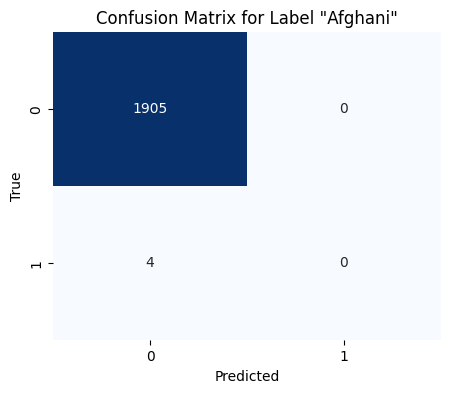

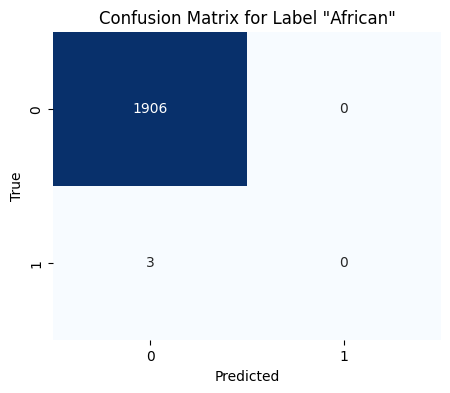

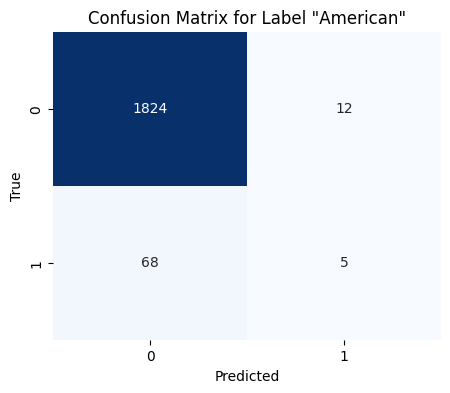

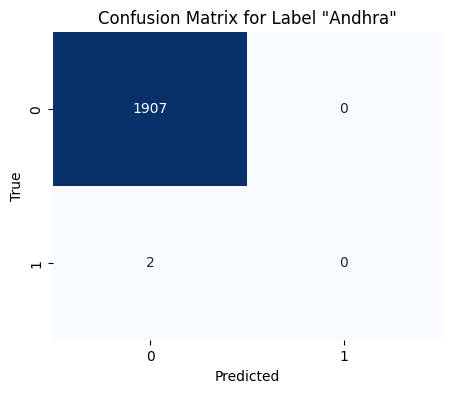

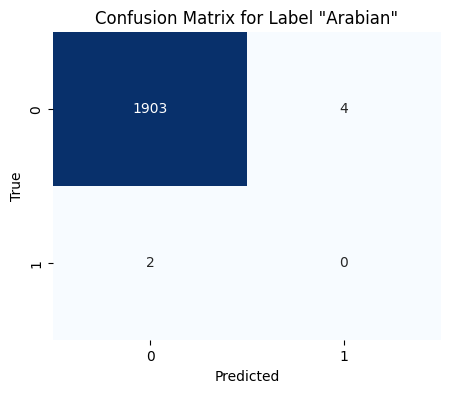

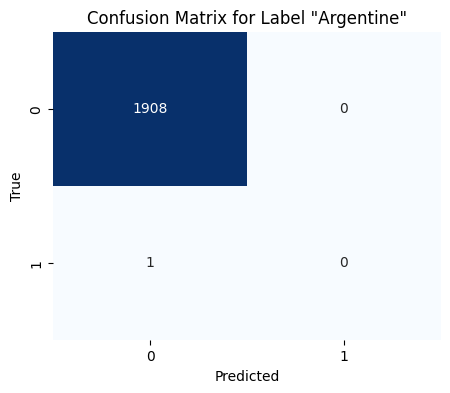

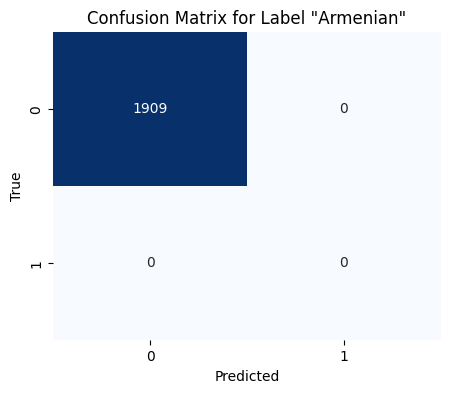

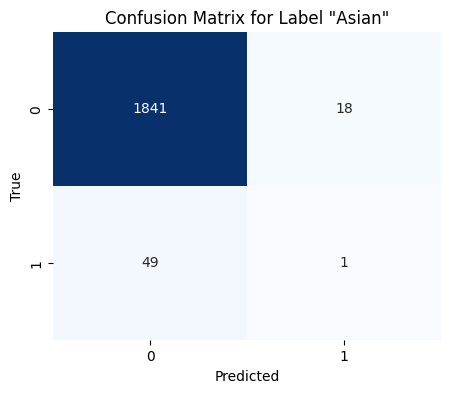

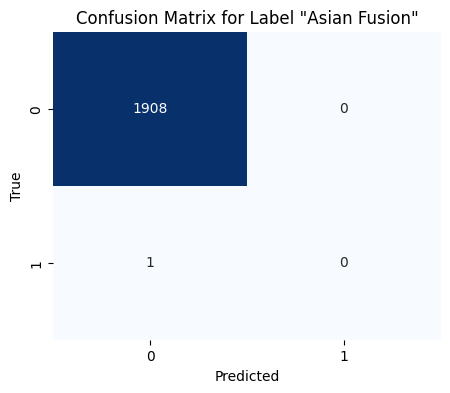

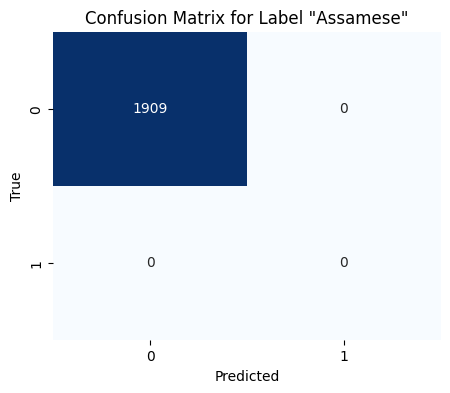

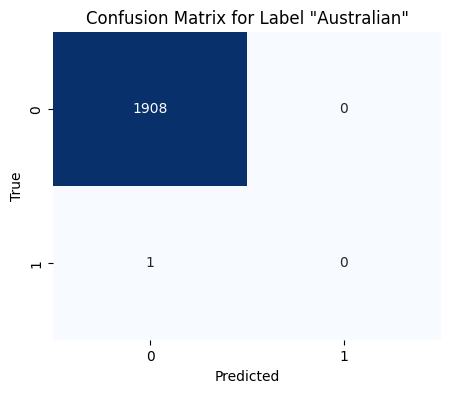

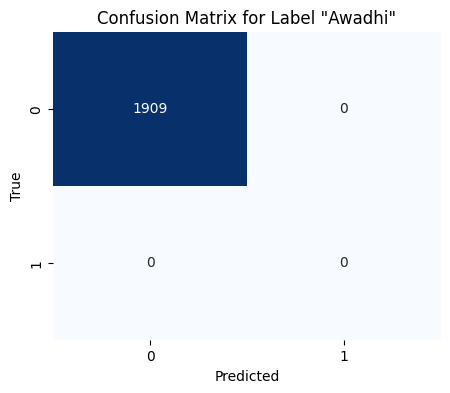

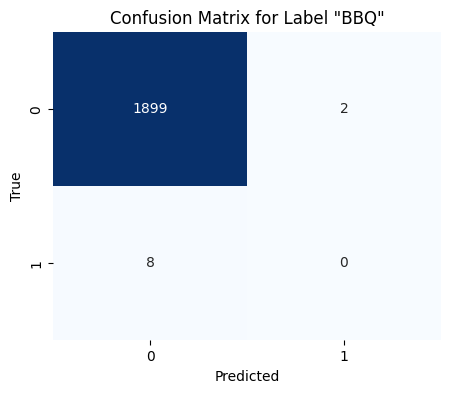

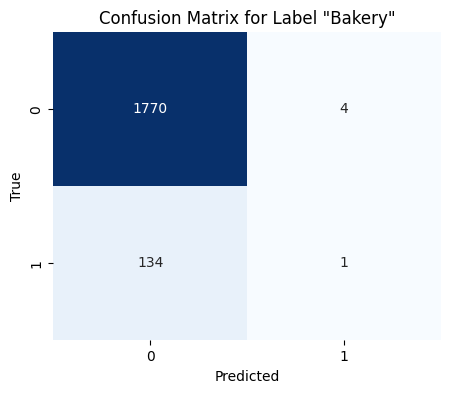

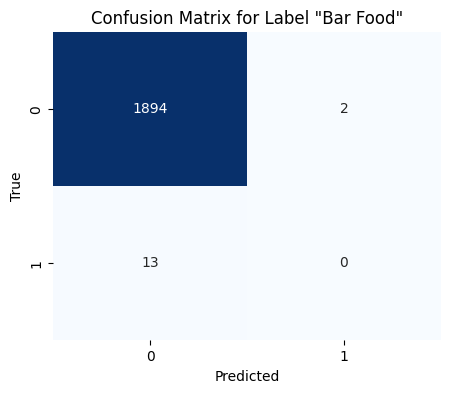

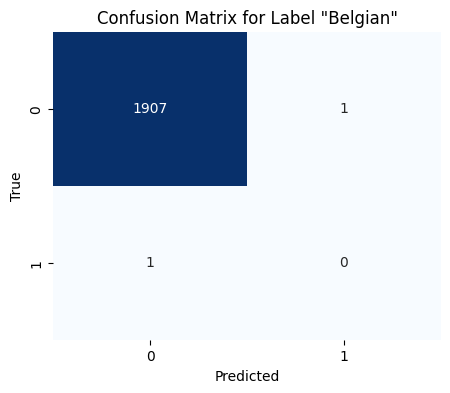

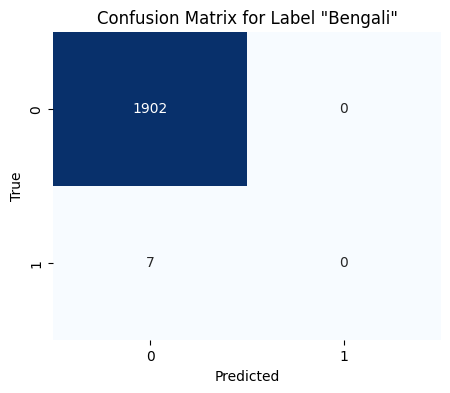

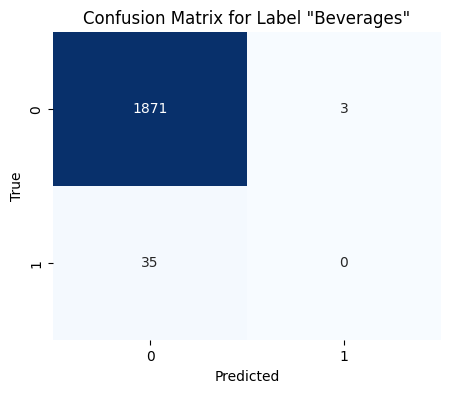

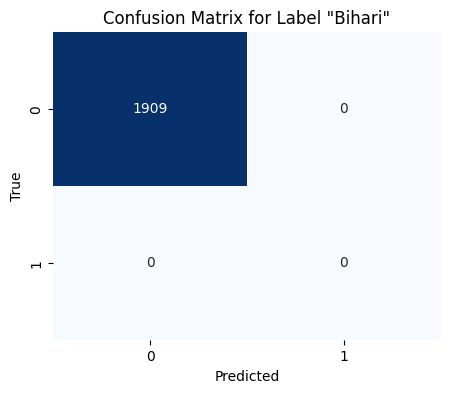

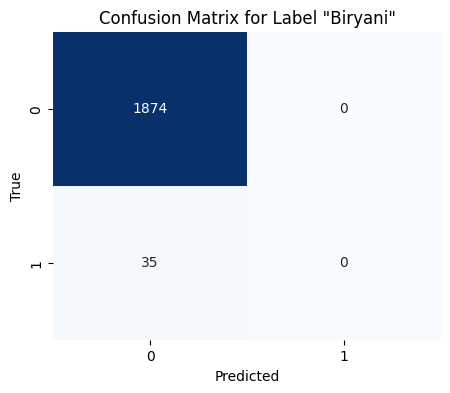

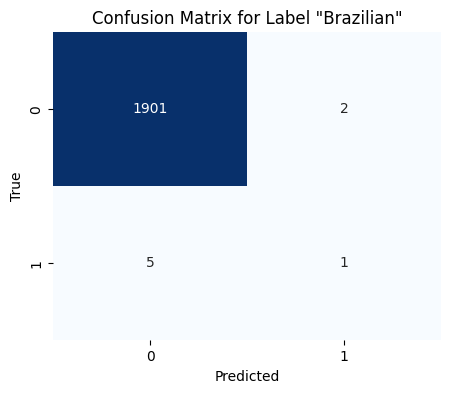

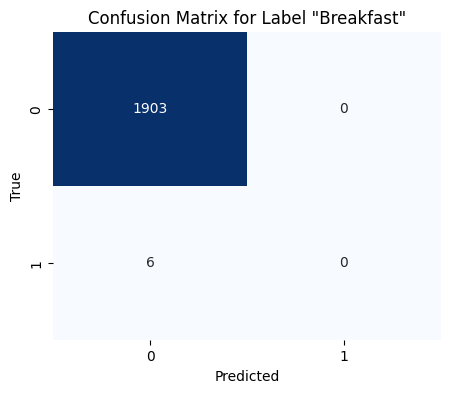

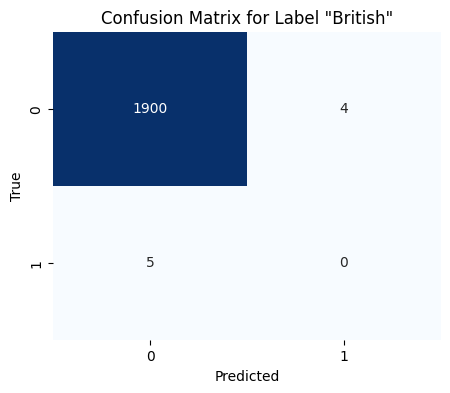

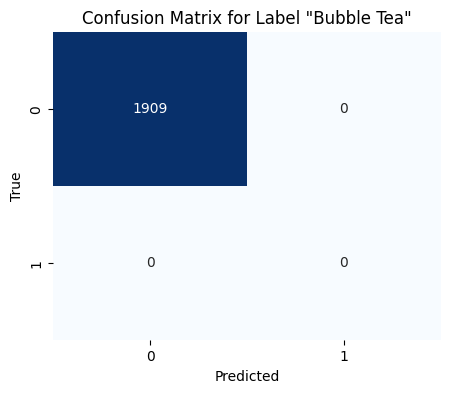

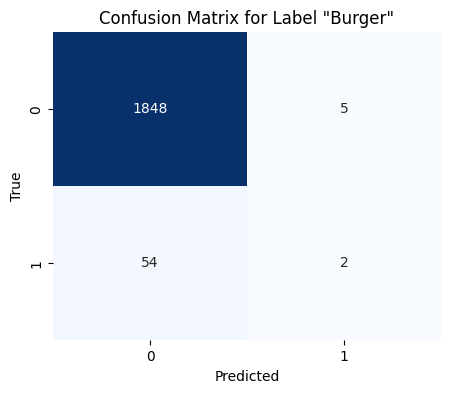

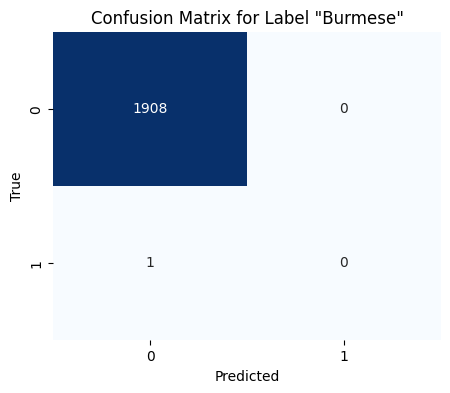

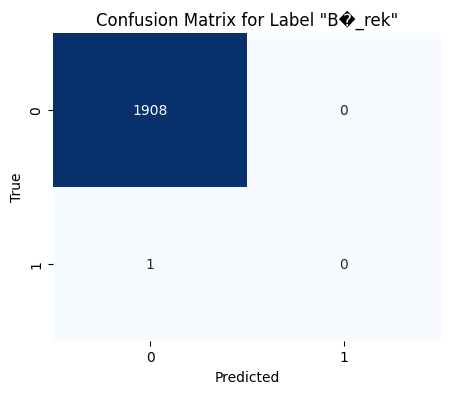

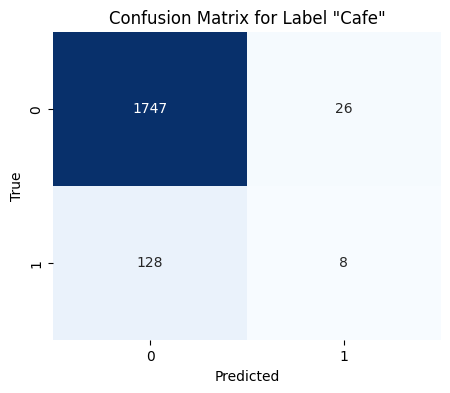

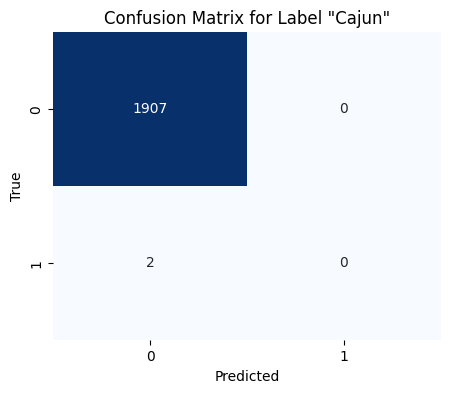

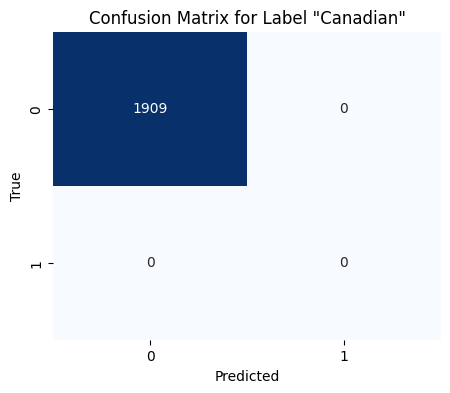

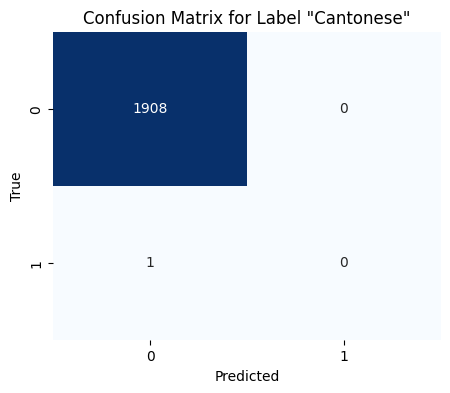

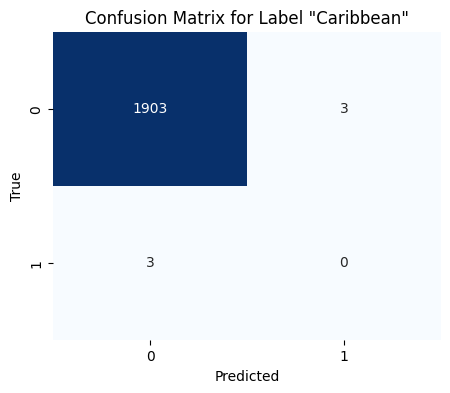

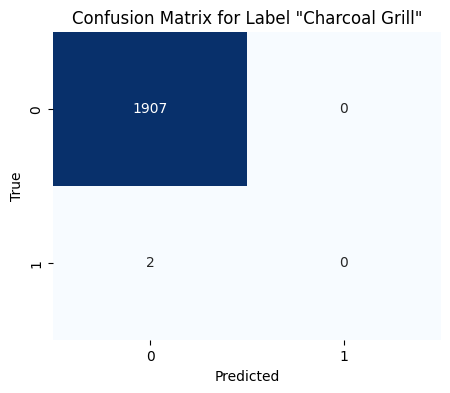

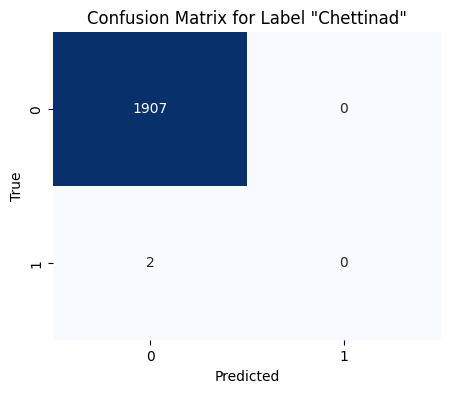

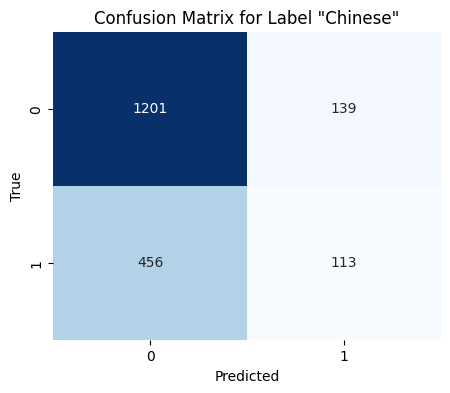

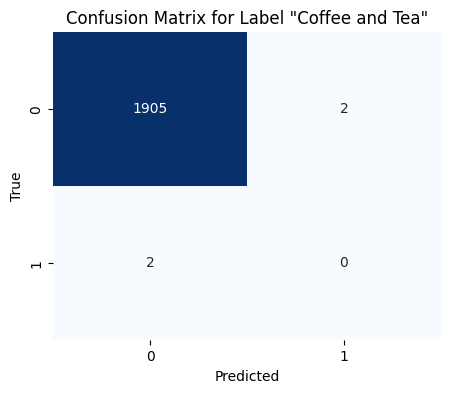

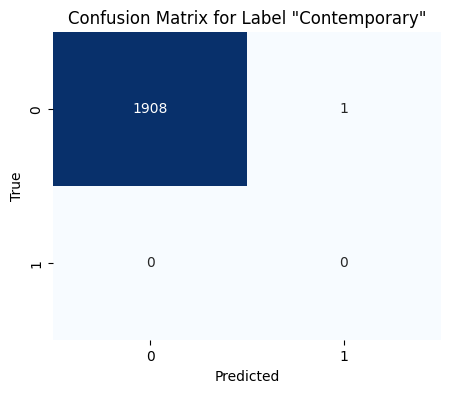

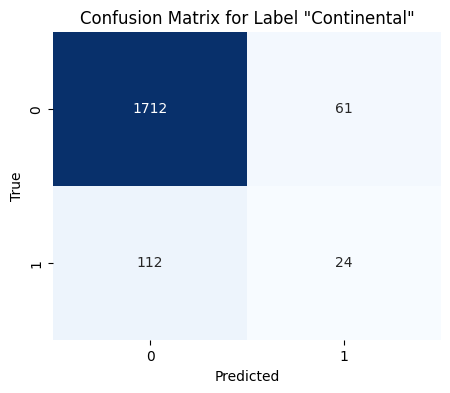

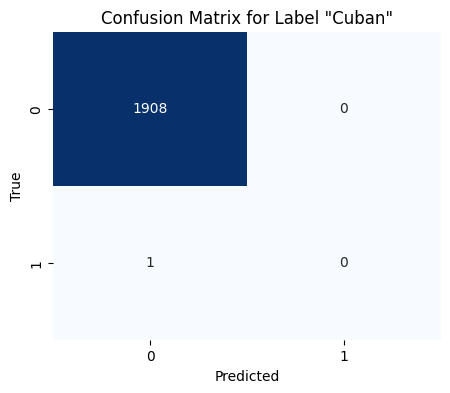

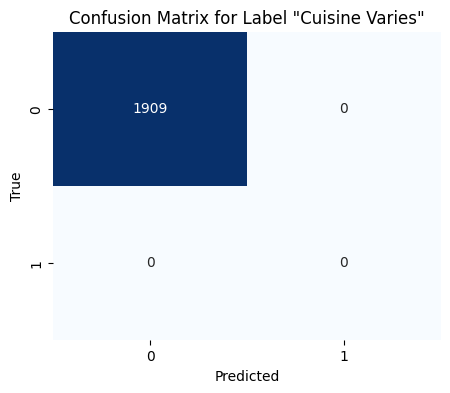

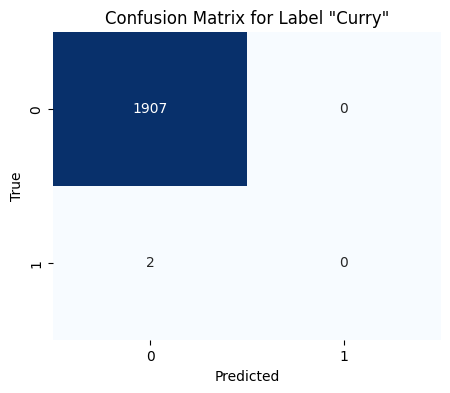

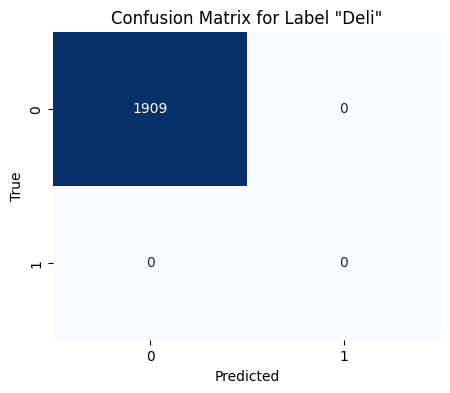

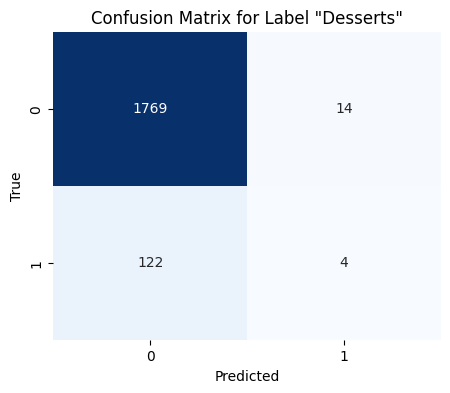

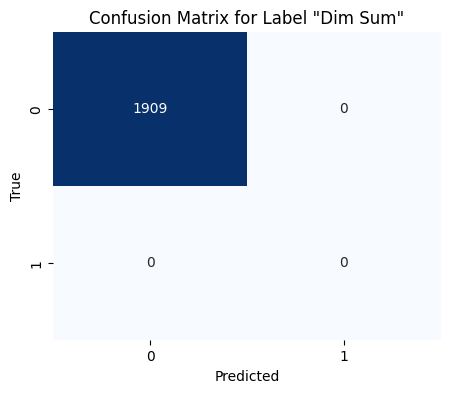

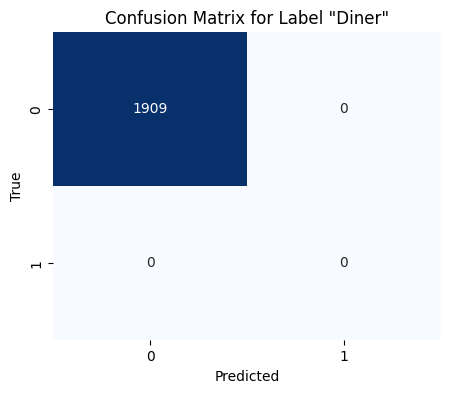

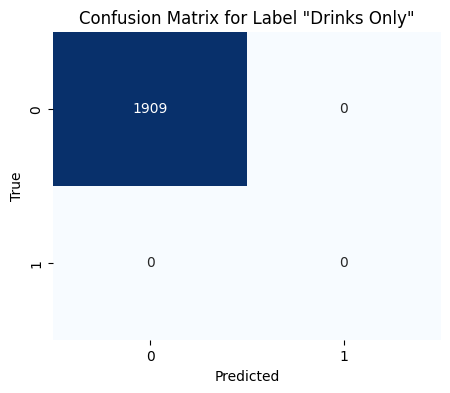

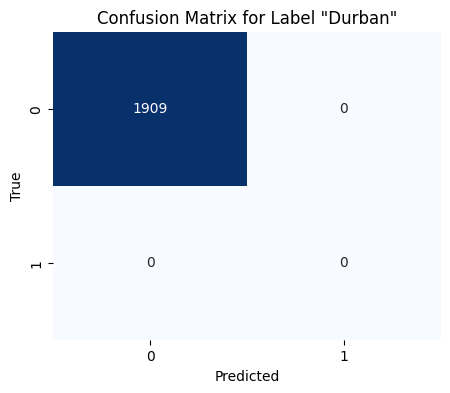

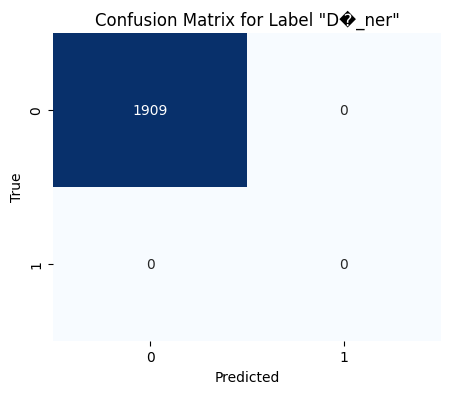

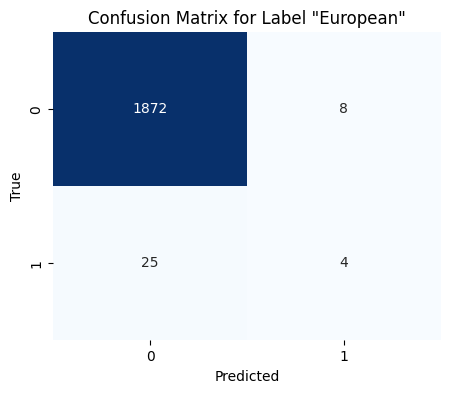

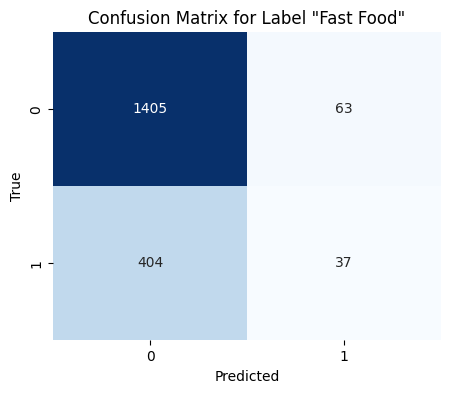

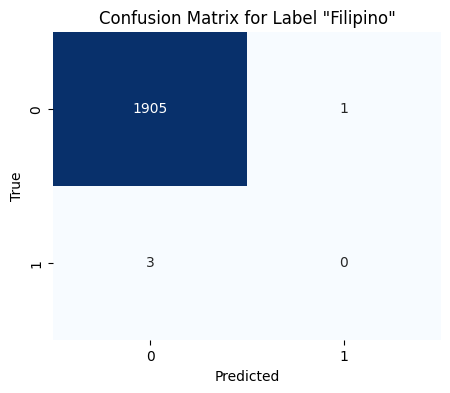

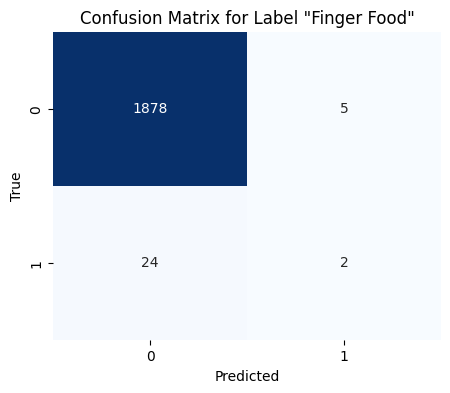

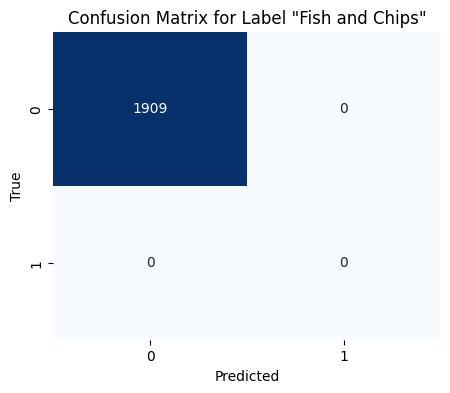

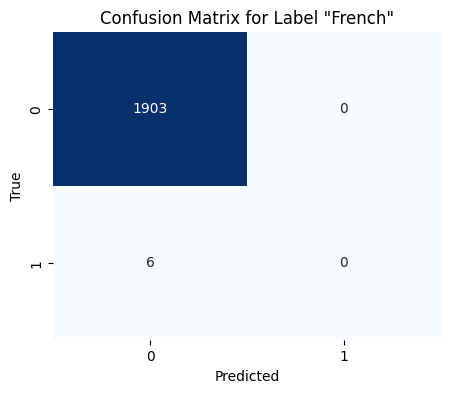

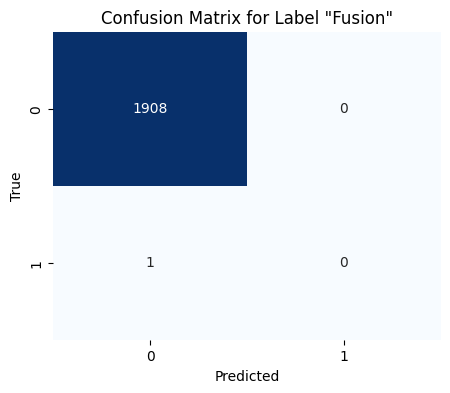

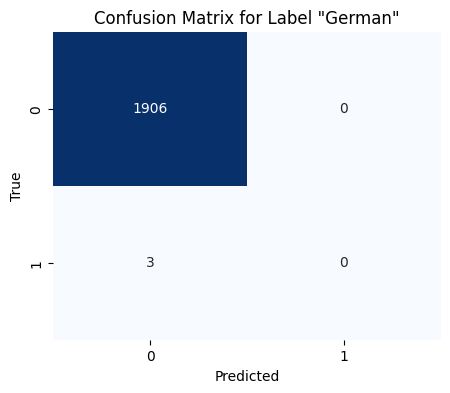

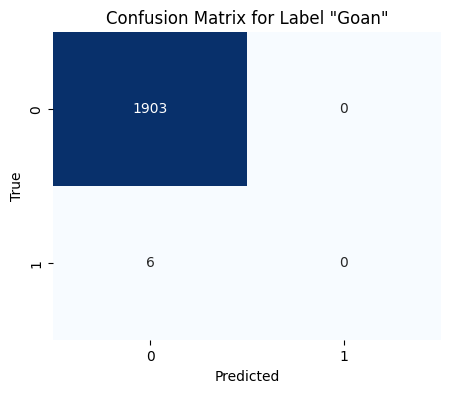

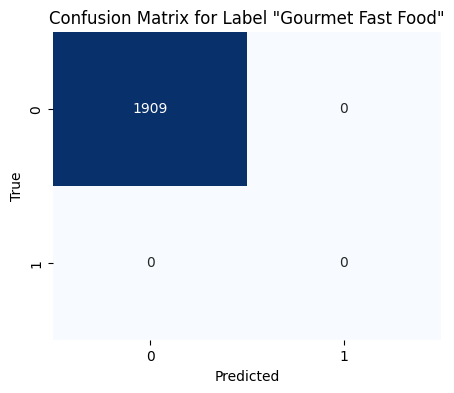

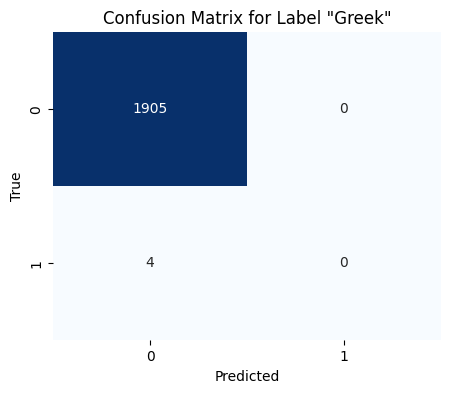

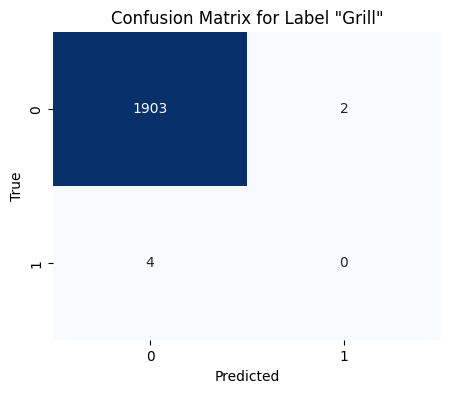

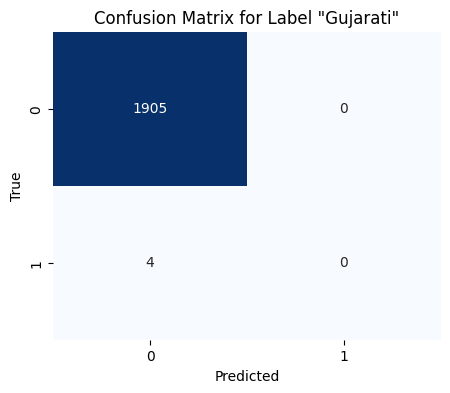

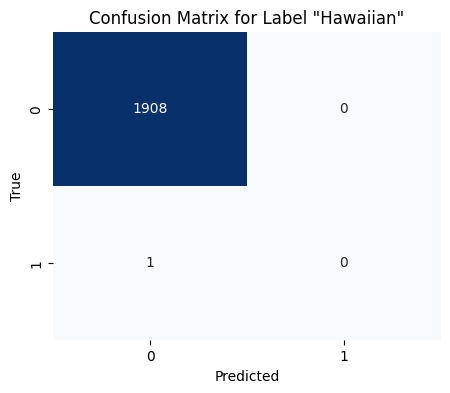

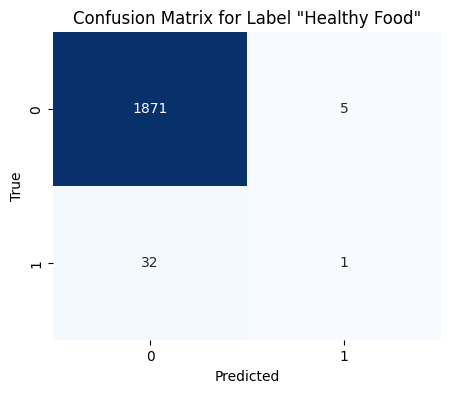

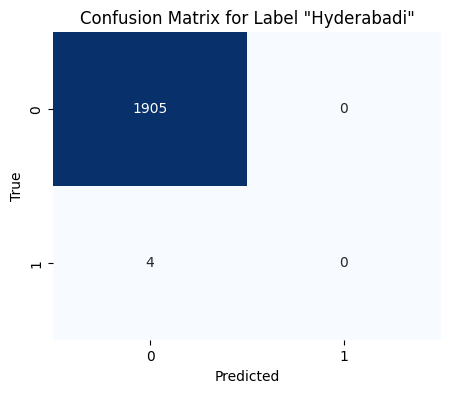

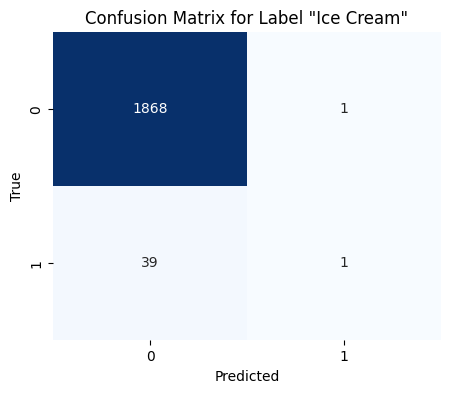

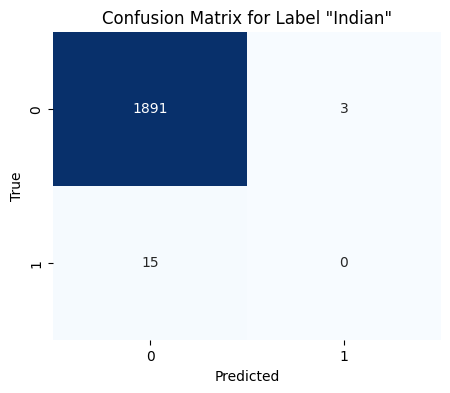

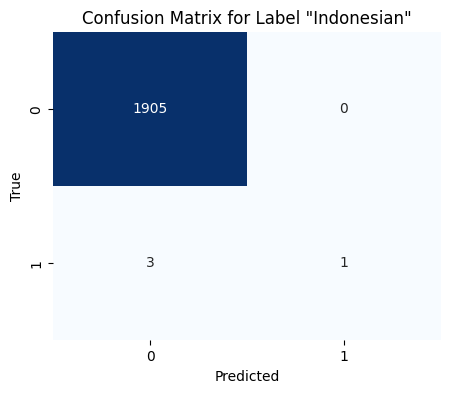

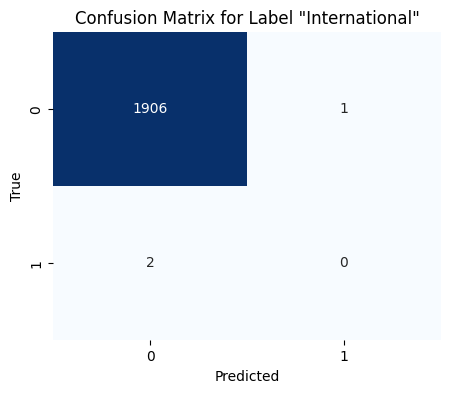

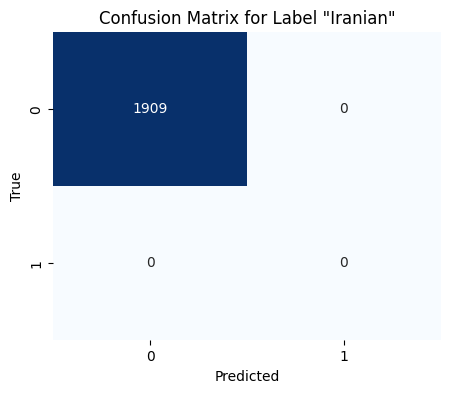

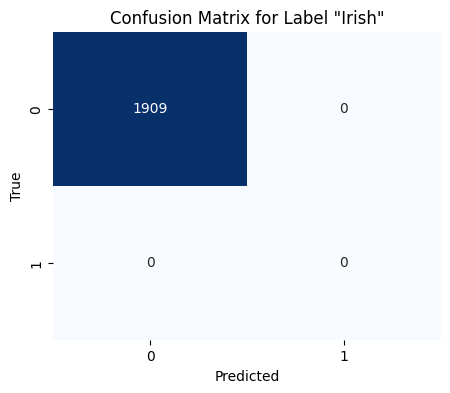

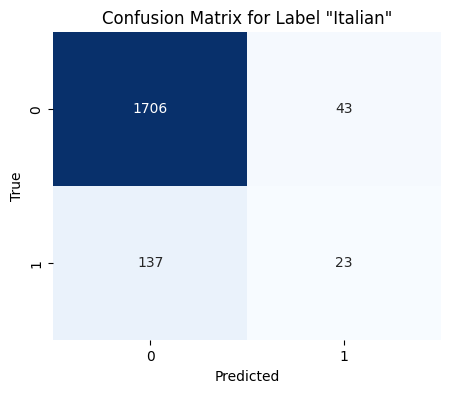

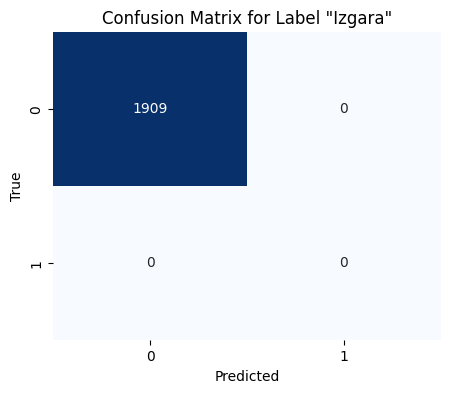

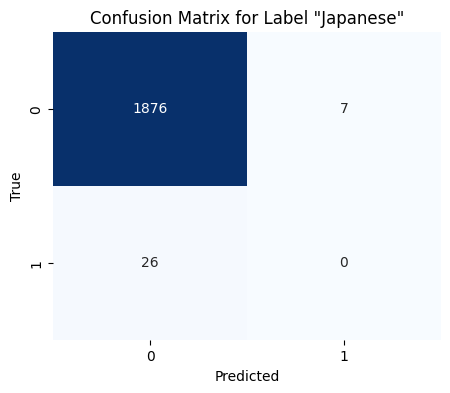

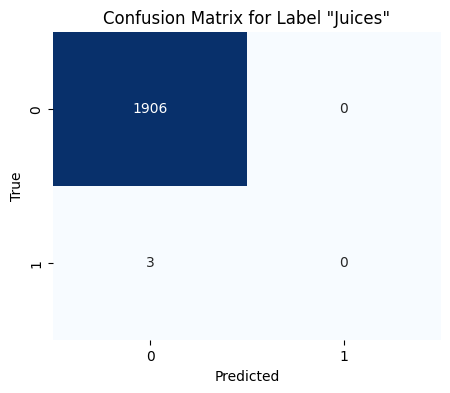

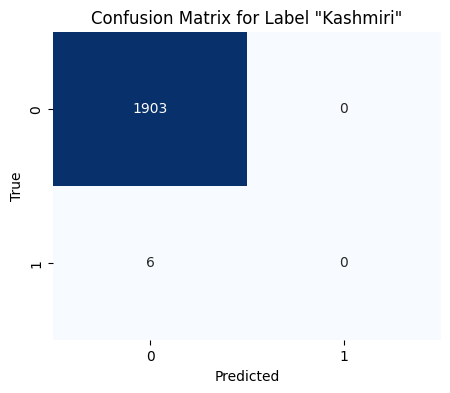

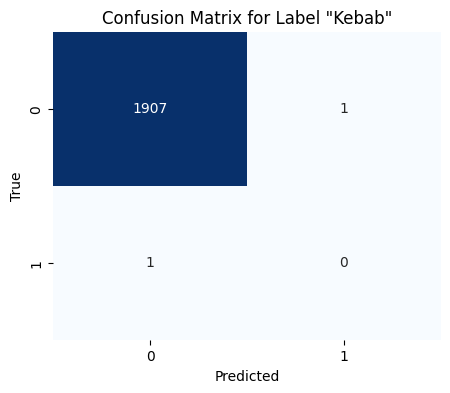

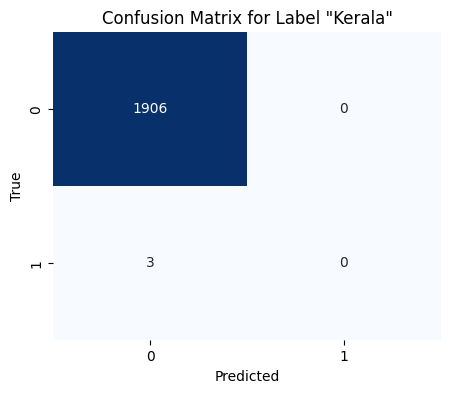

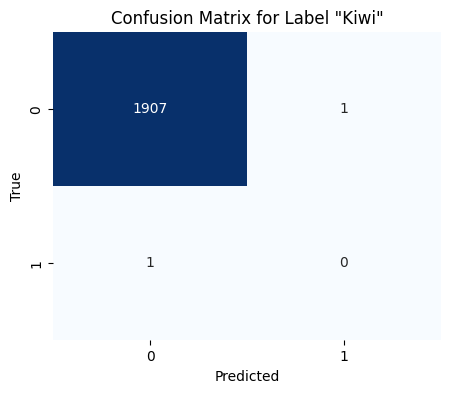

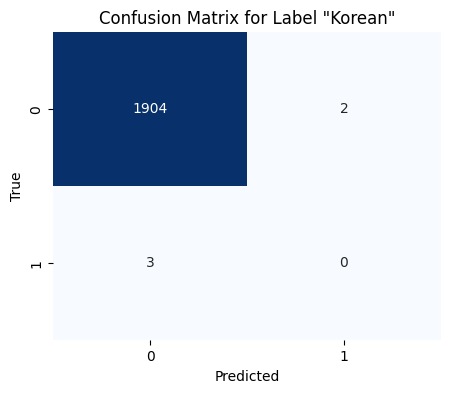

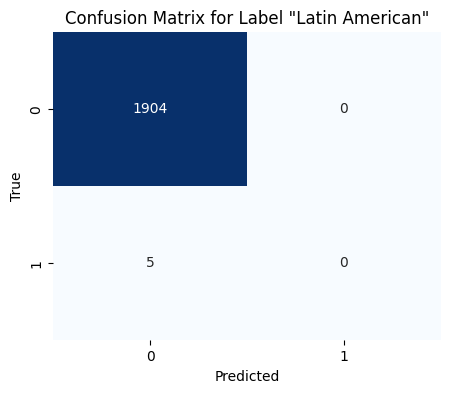

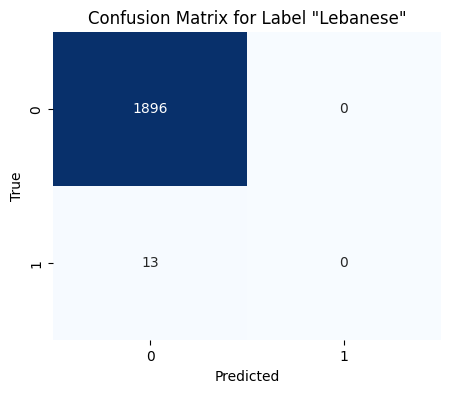

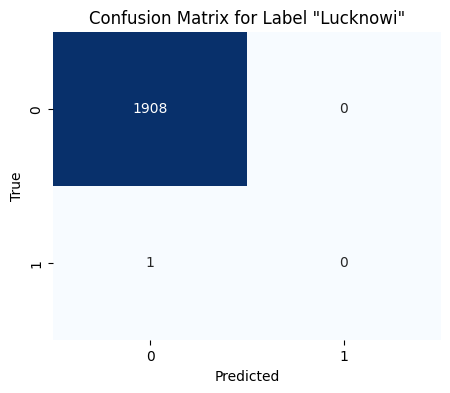

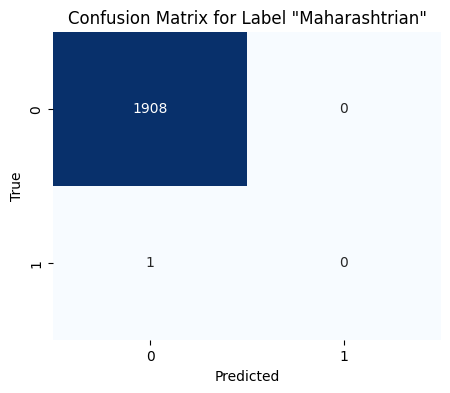

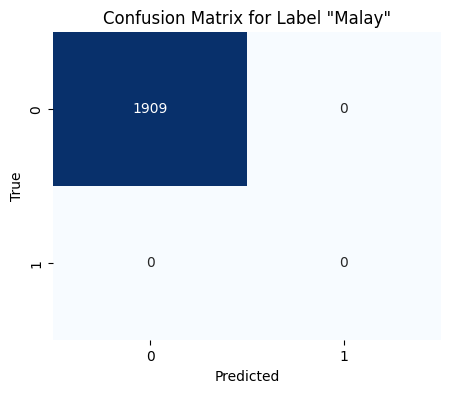

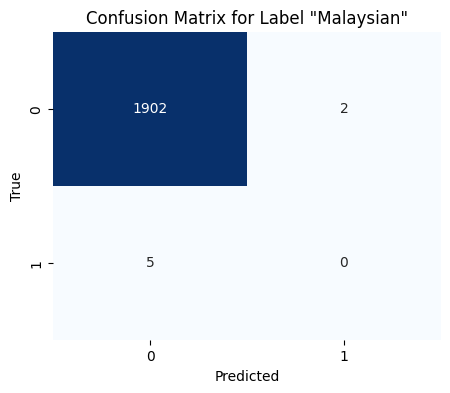

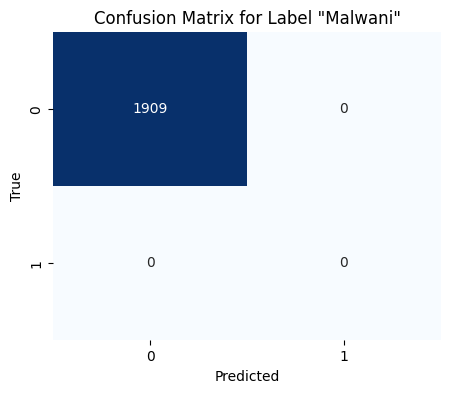

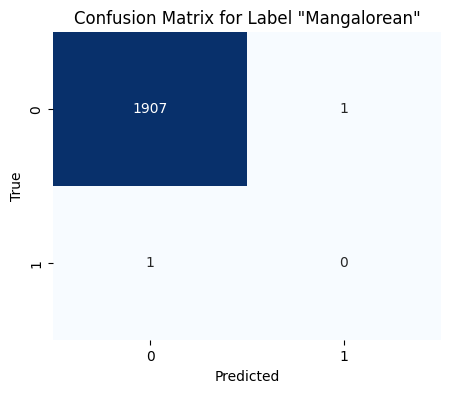

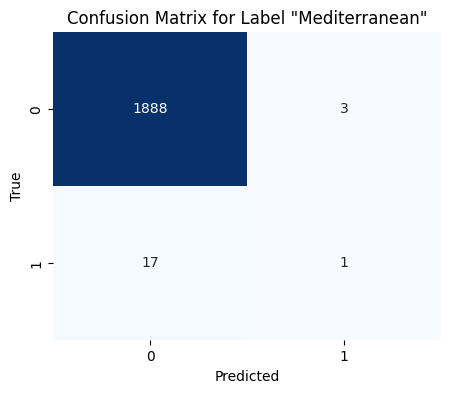

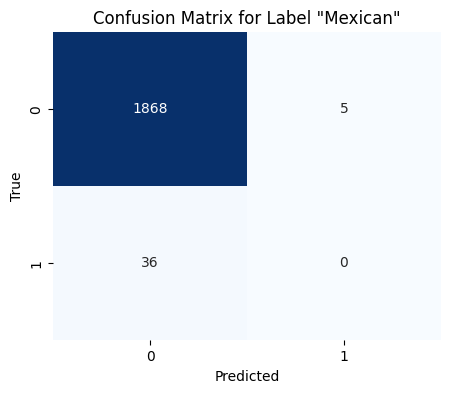

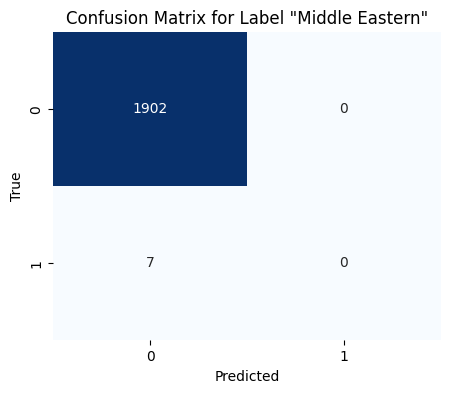

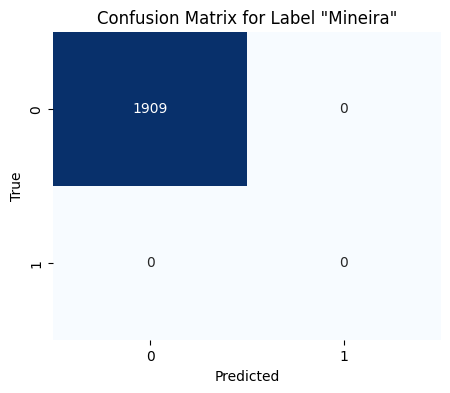

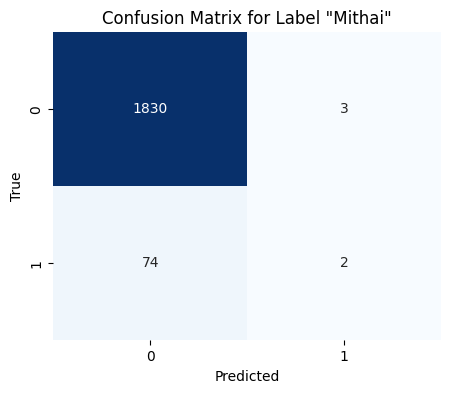

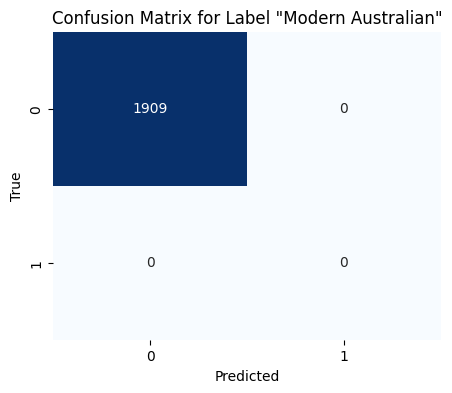

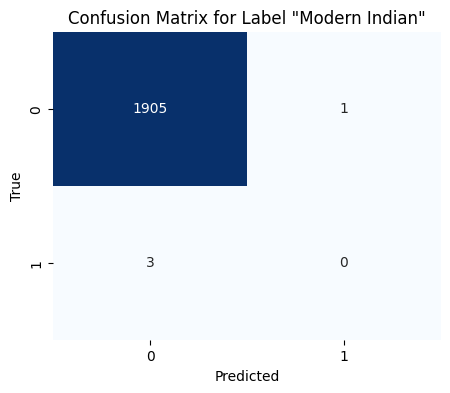

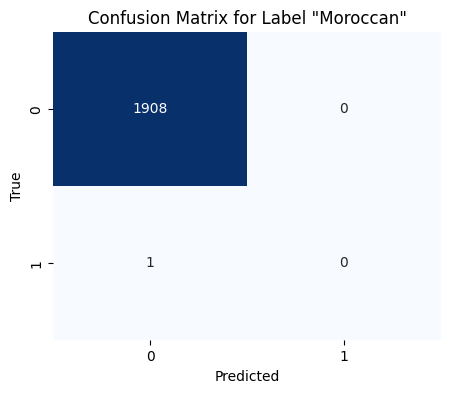

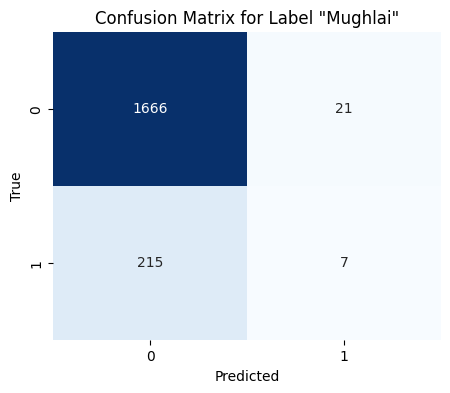

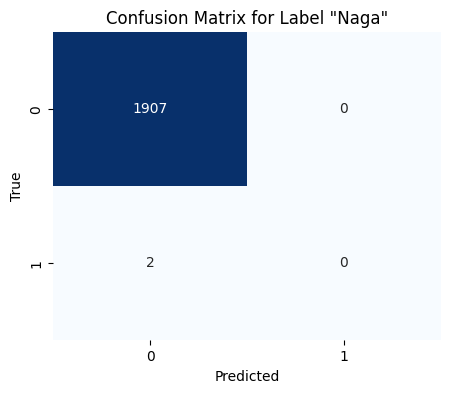

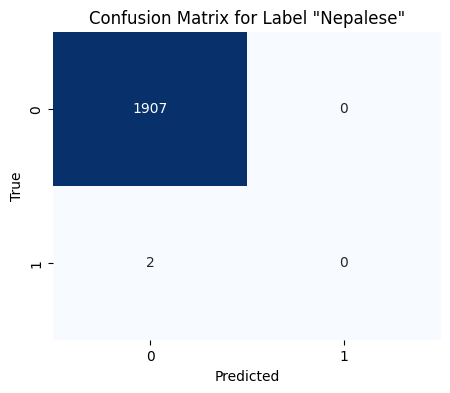

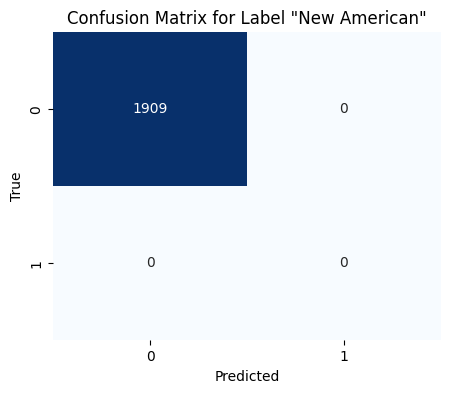

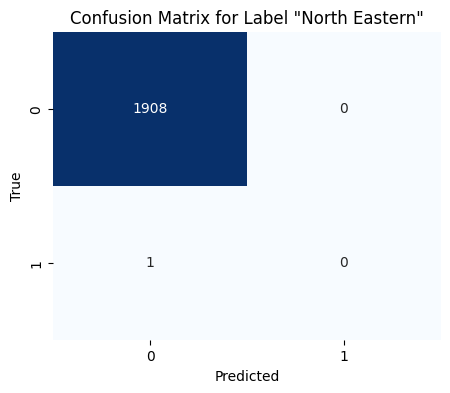

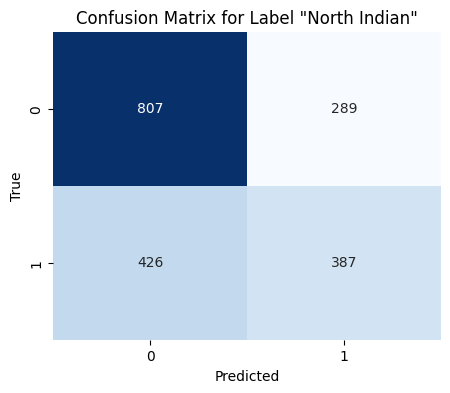

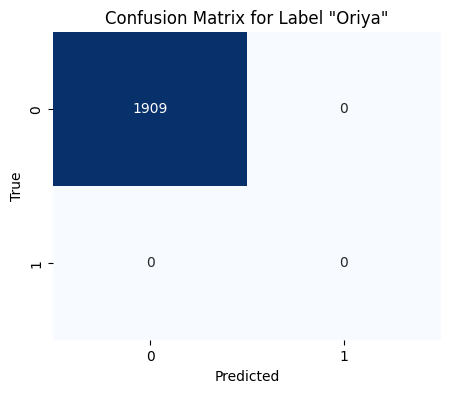

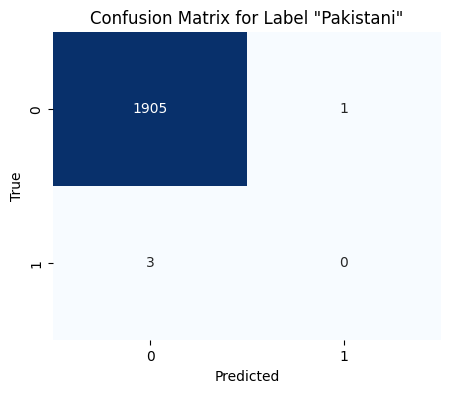

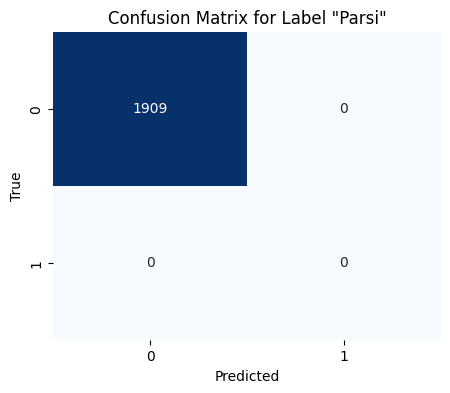

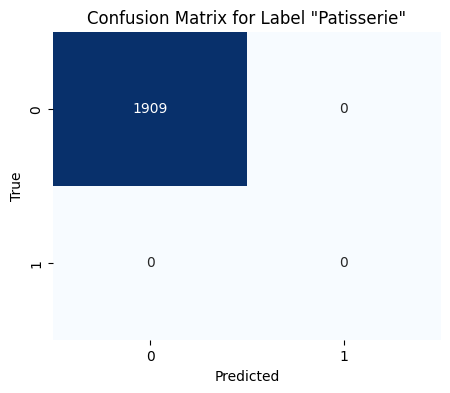

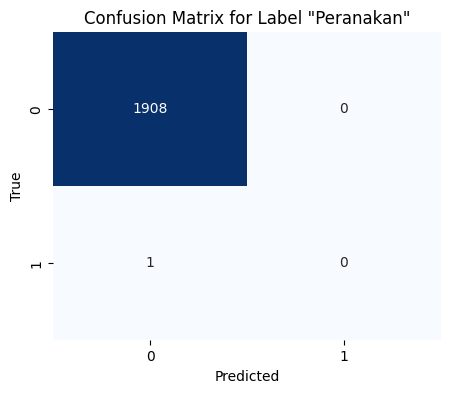

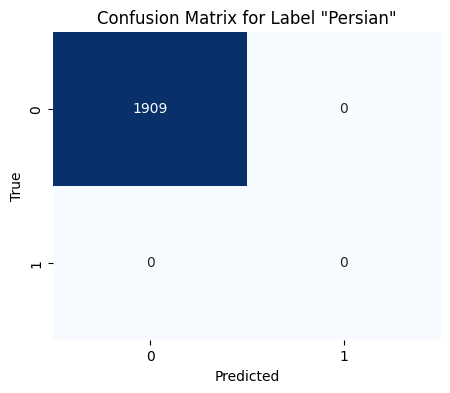

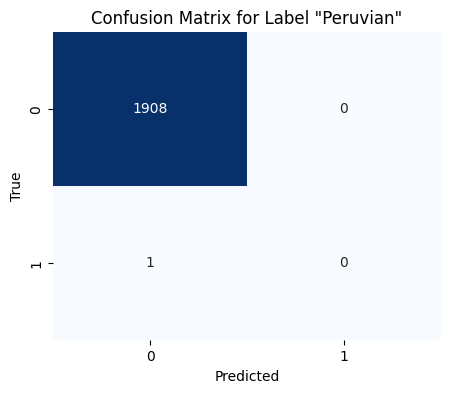

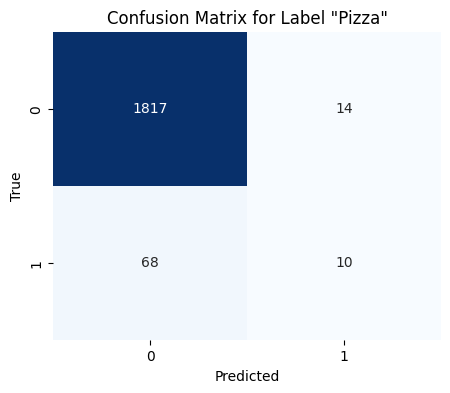

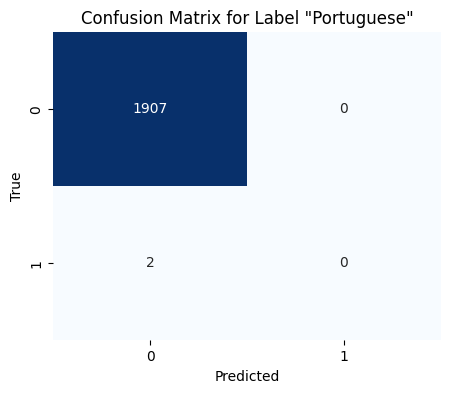

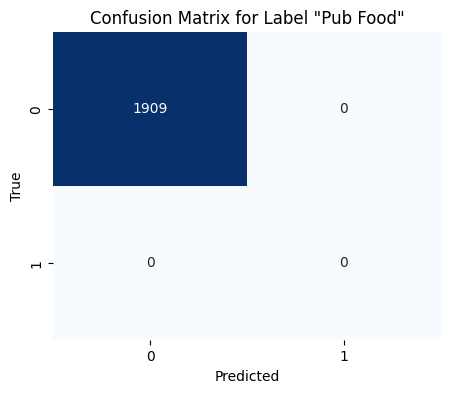

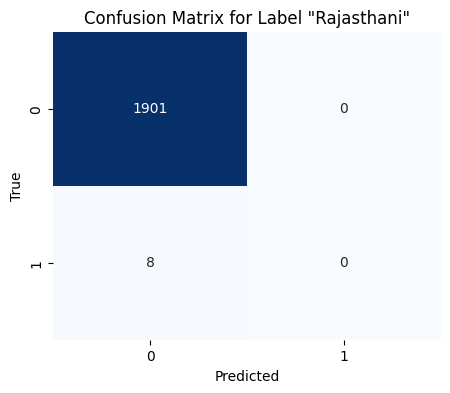

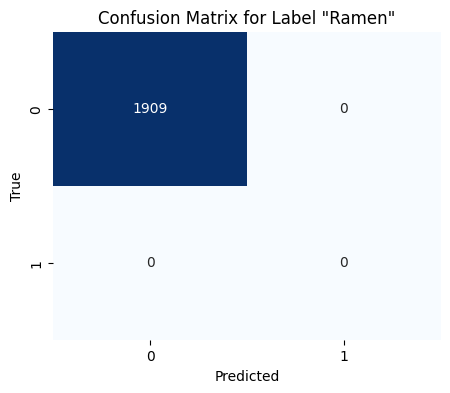

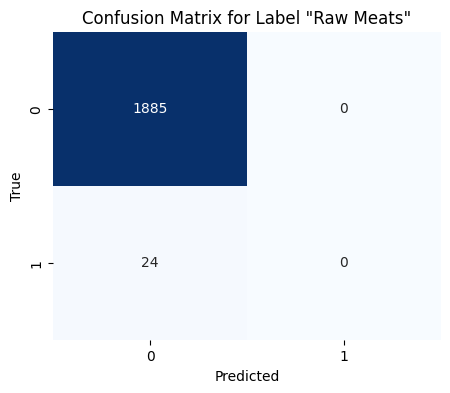

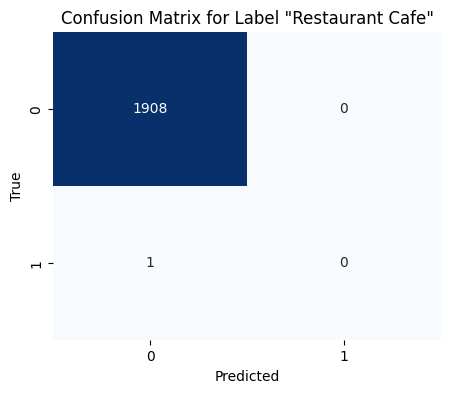

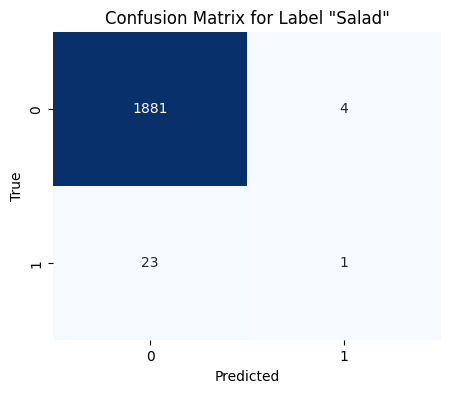

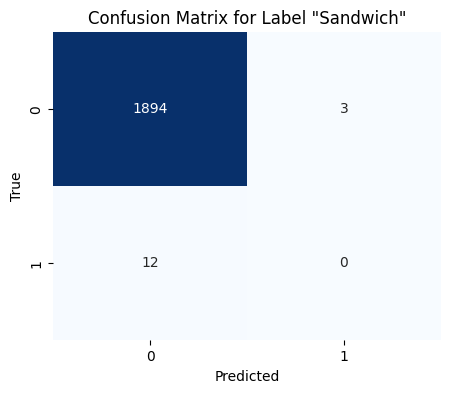

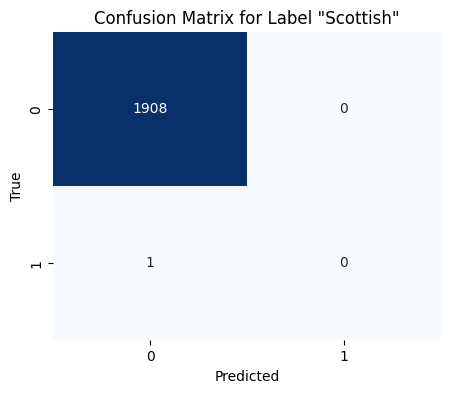

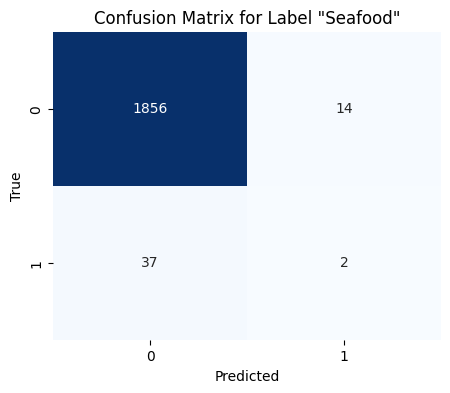

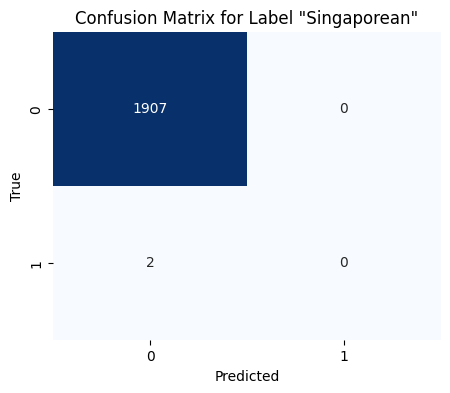

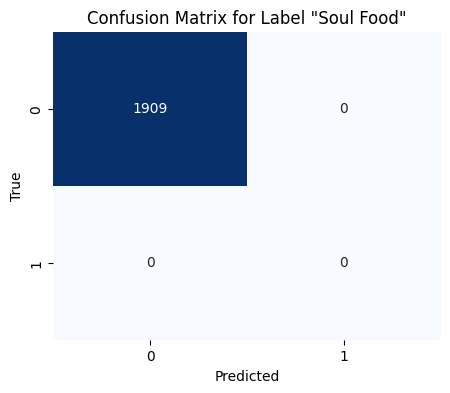

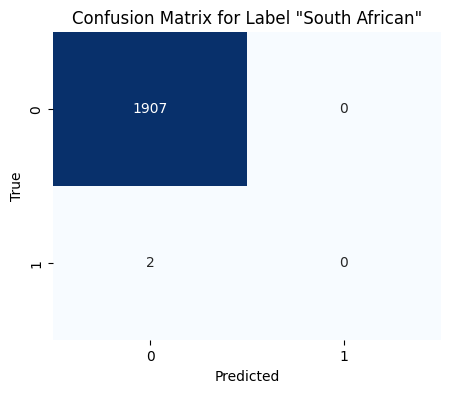

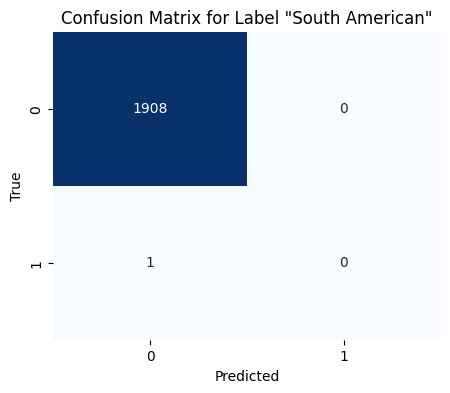

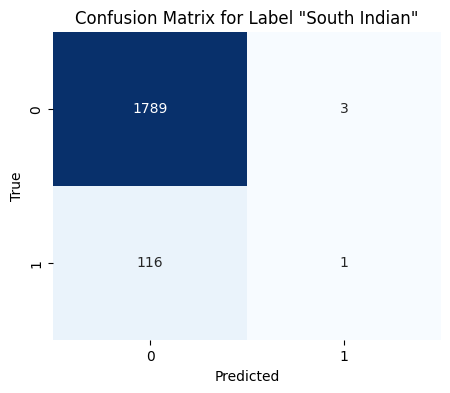

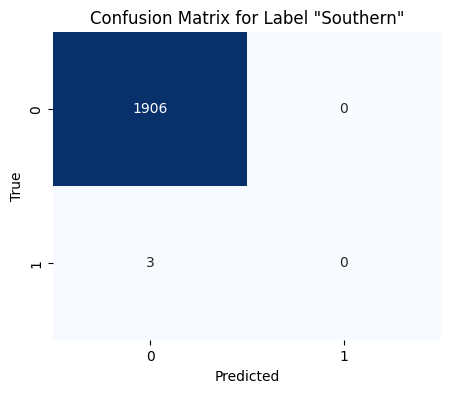

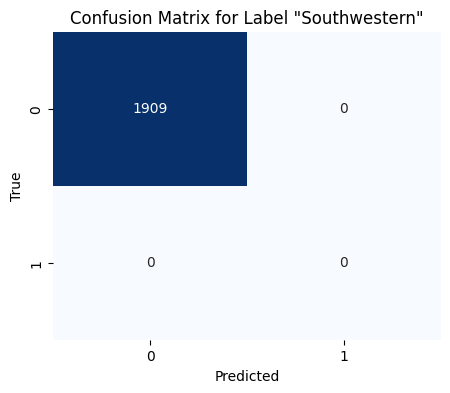

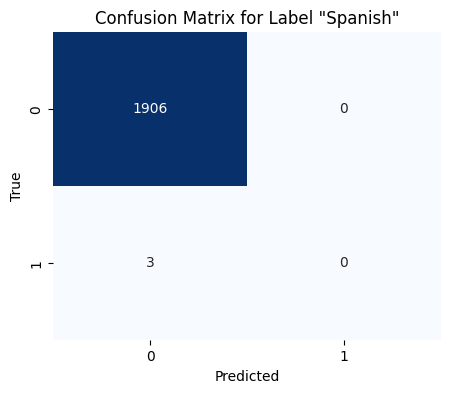

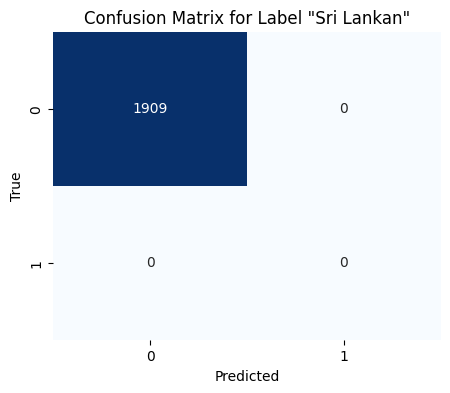

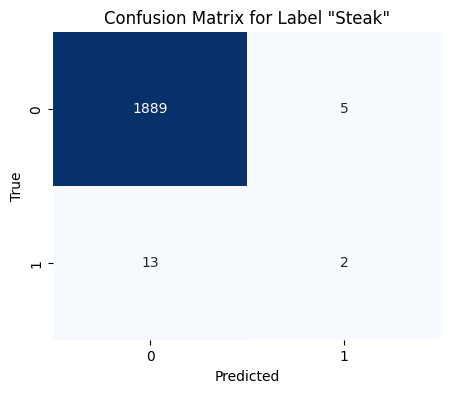

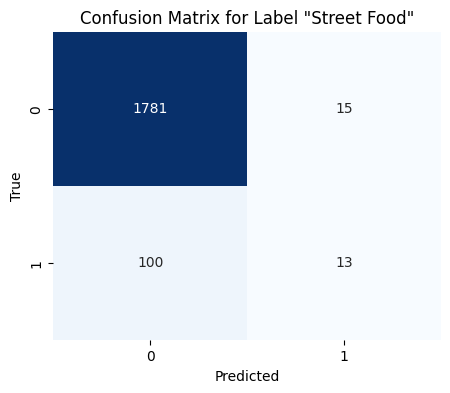

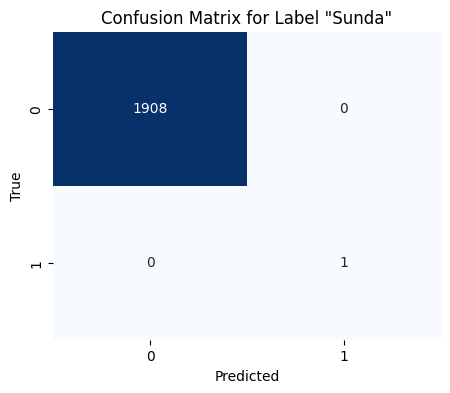

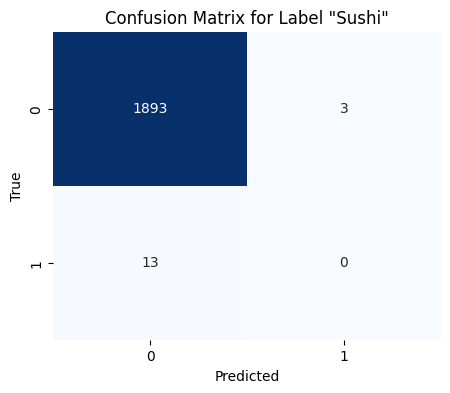

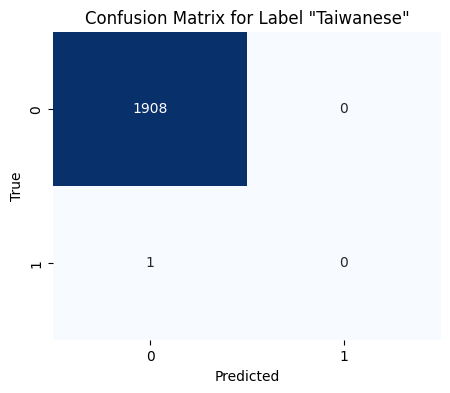

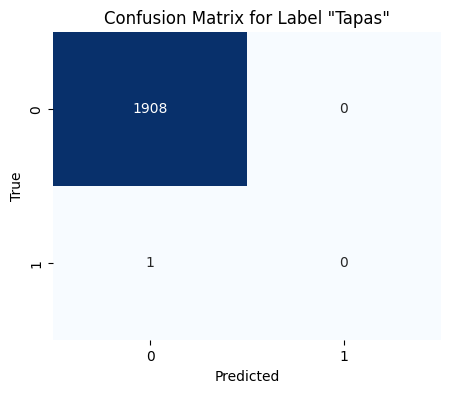

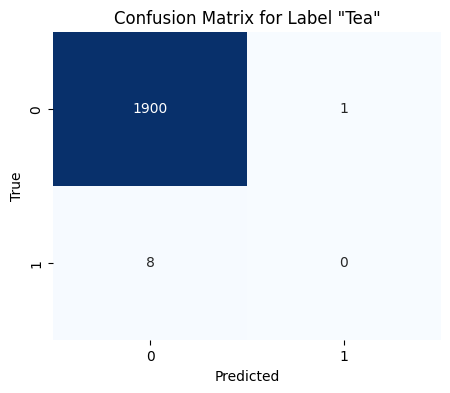

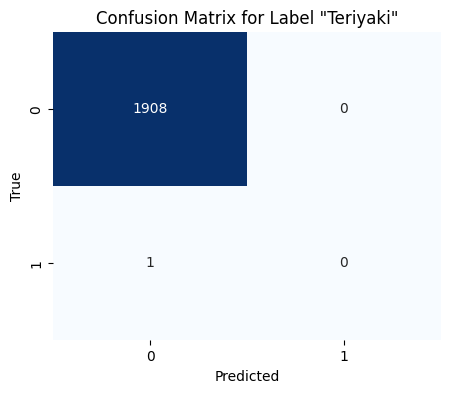

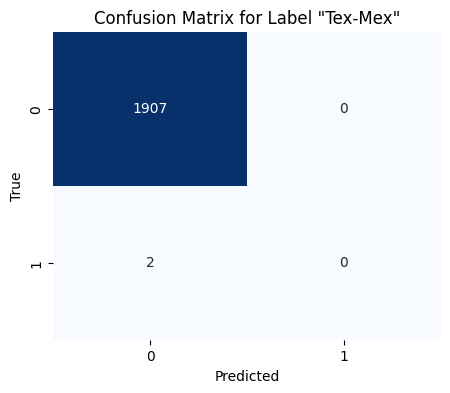

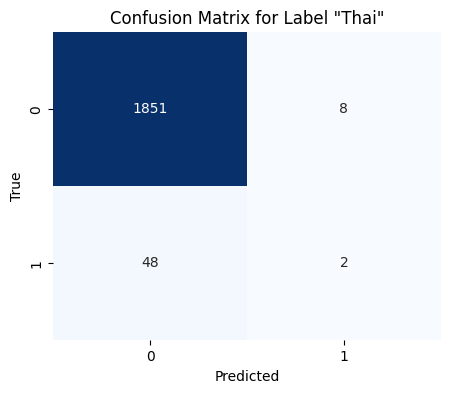

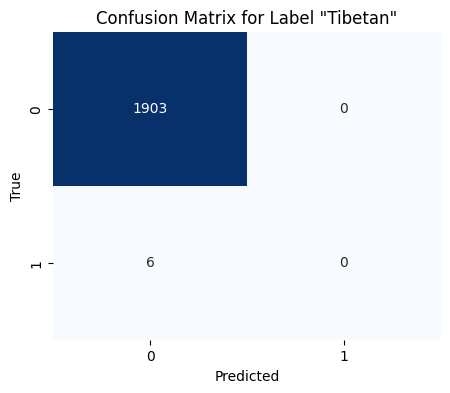

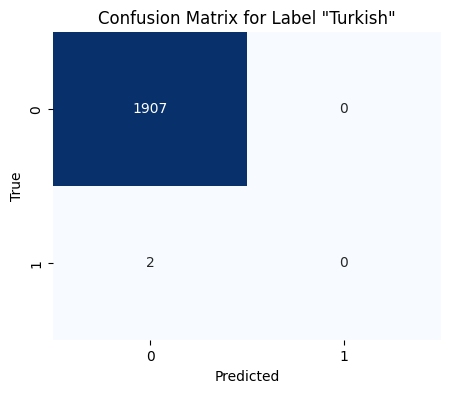

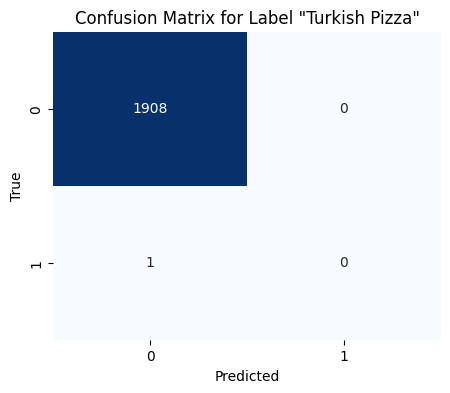

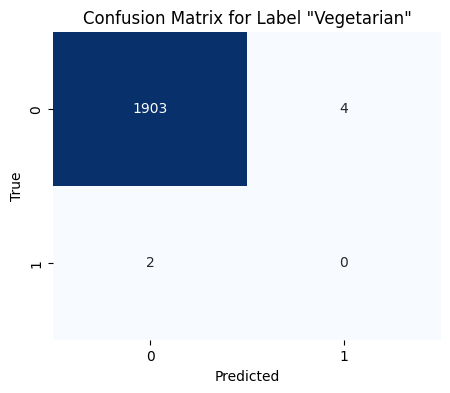

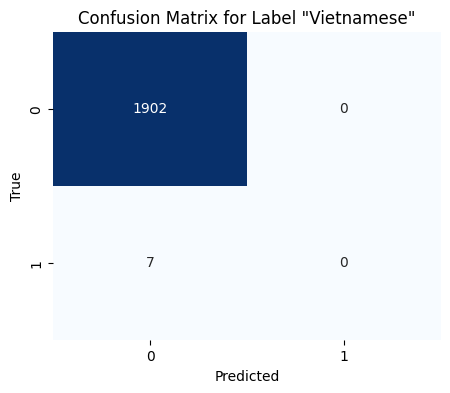

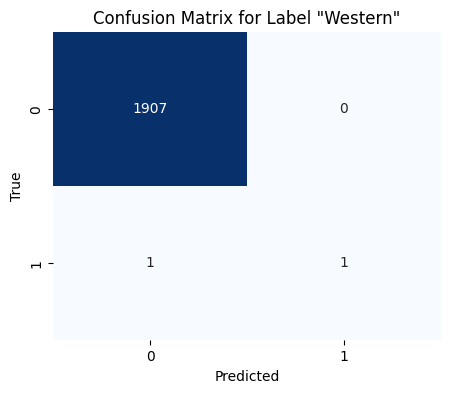

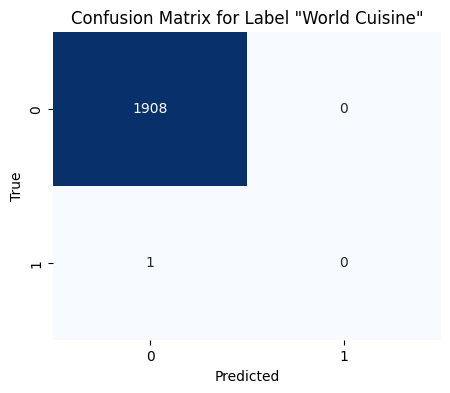

In [29]:
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

for i, matrix in enumerate(conf_matrix):
    label_name = mlb.classes_[i]
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Label "{label_name}"')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()